In [16]:
import os
import sys
import glob
import pathlib
import pickle
import pydicom
import pandas as pd
import numpy as np
import nibabel as nib
import SimpleITK as sitk
import matplotlib.pyplot as plt
import pydicom as pyd
import seaborn as sns
from tqdm import tqdm
from datetime import datetime

os.makedirs('images', exist_ok=True)

#HOME = os.getenv("HOME")

In [17]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk

# Function to load NIfTI (.nii) images
def load_nii_image(filepath):
	img = nib.load(filepath)
	img_data = img.get_fdata()
	return img_data

# Function to extract the maximum and minimum intensities from a list of images
def extract_min_max_intensities(image_paths):
	min_intensities = []
	max_intensities = []
	mean_intensities = []
	sum_intensities = []
	slices = []

	min_slice = 10000
	max_slice = 0

	for image_path in image_paths:
		#img_data = load_nii_image(image_path)
		img_data = sitk.GetArrayFromImage(sitk.ReadImage(image_path))

		img_data = np.clip(img_data, -1024, 1024)

		min_intensities.append(np.min(img_data))
		max_intensities.append(np.max(img_data))
		mean_intensities.append(np.mean(img_data))
		sum_intensities.append(np.sum(img_data))
		slices.append(img_data.shape[0])
		#print(np.min(img_data), np.max(img_data))

		if min_slice>img_data.shape[0]:
			min_slice=img_data.shape[0]
		if max_slice<img_data.shape[0]:
			max_slice=img_data.shape[0]

	return min_intensities, max_intensities, mean_intensities, sum_intensities, slices, min_slice, max_slice

def plot_intensity_distributions_fatias(medias, title='', title_x='Volumes', title_y=''):
	plt.figure(figsize=(8, 5))
	plt.bar(range(1, len(medias)+1), medias, color='skyblue', edgecolor='black')

	# Chart settings
	plt.title(title, fontsize=14, fontweight='bold')
	plt.xlabel(title_x, fontsize=14, fontweight='bold') #, labelpad=1
	plt.ylabel(title_y, fontsize=14, fontweight='bold')
	#plt.xticks(x_labels)  # Garantir que o eixo X começa em 1
	#plt.ylim(0, max(medias) + 10)  # Limite superior do eixo Y
	plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar grade no eixo Y

	plt.xticks(fontsize=14, fontweight='bold')  # Rótulos do eixo X
	plt.yticks(fontsize=14, fontweight='bold')  # Rótulos do eixo Y

	#plt.gca().invert_yaxis()

	# Display the chart
	plt.tight_layout()
	plt.savefig(f"images/{title.replace(' ','_')}.eps", dpi=200, format='eps')
	plt.show()

# List of file paths for example images
hcu_paths = sorted(glob.glob(os.path.join('/mnt/data/dataset_test/renomeados/images_HCU', '*.nii.gz')))
task06_paths = sorted(glob.glob(os.path.join('/mnt/data/dataset_test/images_Task06', '*.nii.gz')))
#hcu_paths = sorted(glob.glob(os.path.join('Locca/images_HCU', '*.nii.gz')))
#task06_paths = sorted(glob.glob(os.path.join('Locca/images_Task06', '*.nii.gz')))

print(len(hcu_paths))
print(len(task06_paths))

# Extraction of maximum and minimum intensities
task06_min_intensities, task06_max_intensities, task06_mean_intensities, task06_sum_intensities, task06_slices, task06_min_slice, task06_max_slice = extract_min_max_intensities(task06_paths)

print(np.min(task06_min_intensities))
print(np.min(task06_max_intensities))

print(task06_min_slice)
print(task06_max_slice)

# Extraction of maximum and minimum intensities
hcu_min_intensities, hcu_max_intensities, hcu_mean_intensities, hcu_sum_intensities, hcu_slices, hcu_min_slice, hcu_max_slice = extract_min_max_intensities(hcu_paths)

print(np.min(hcu_min_intensities))
print(np.min(hcu_max_intensities))

print(hcu_min_slice)
print(hcu_max_slice)

30
30
-1024.0
1024.0
128
580
-1024
1024
217
1126


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


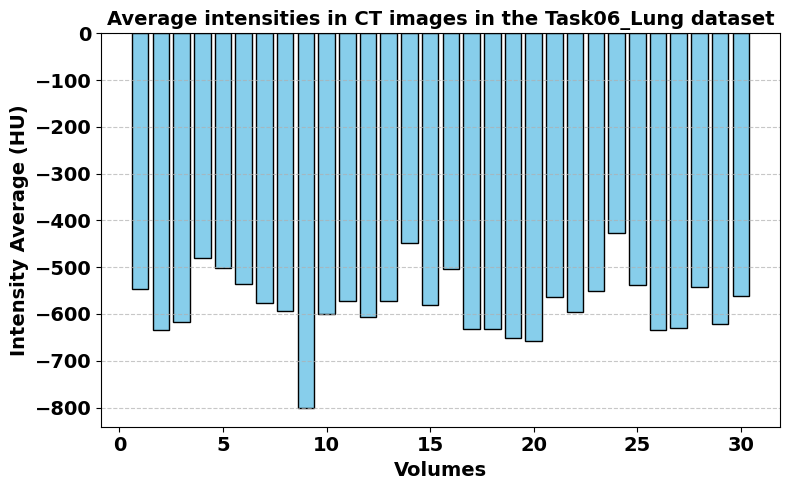

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


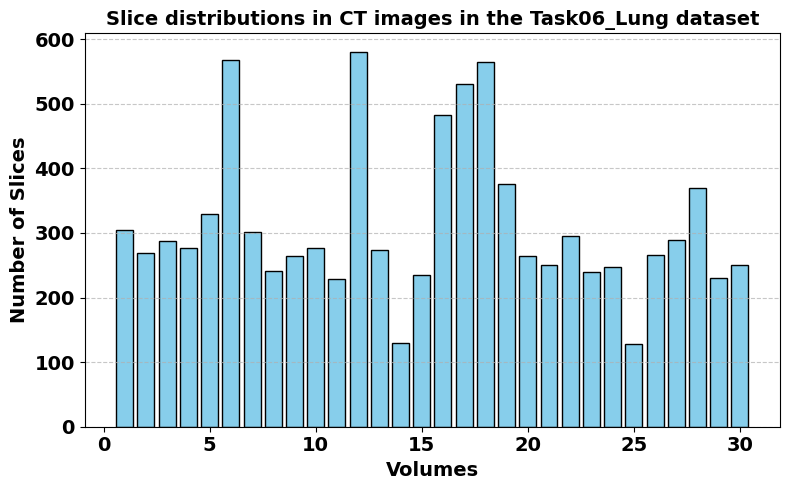

In [18]:
plot_intensity_distributions_fatias(task06_mean_intensities, title="Average intensities in CT images in the Task06_Lung dataset", title_y='Intensity Average (HU)')
#plot_intensity_distributions_fatias(task06_sum_intensities, title="Sum of intensity in CT images in the Task06_Lung dataset", title_y='Sum of Intensities (HU)')
#plot_intensity_distributions_fatias(task06_min_intensities, title="Minimum intensity values ​​in CT images from the Task06_Lung dataset", title_y='Intensities (HU)')
#plot_intensity_distributions_fatias(task06_max_intensities, title="Maximum intensity values ​​in CT images from the Task06_Lung dataset", title_y='Intensities (HU)')
plot_intensity_distributions_fatias(task06_slices, title="Slice distributions in CT images in the Task06_Lung dataset", title_x='Volumes', title_y='Number of Slices')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


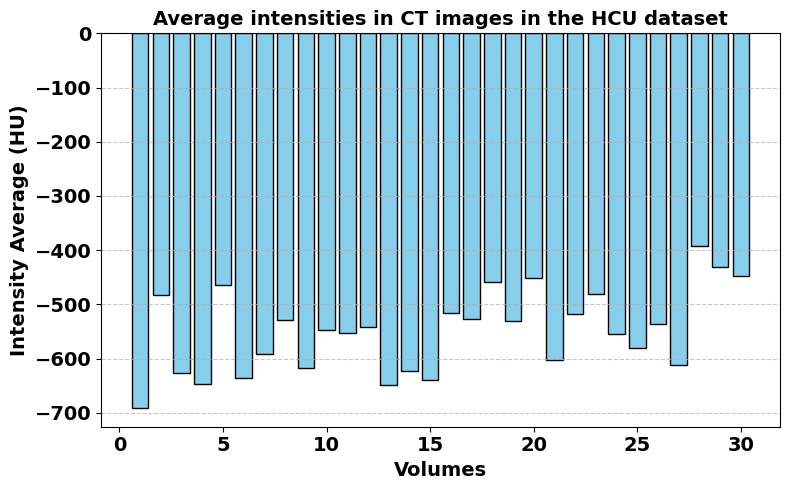

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


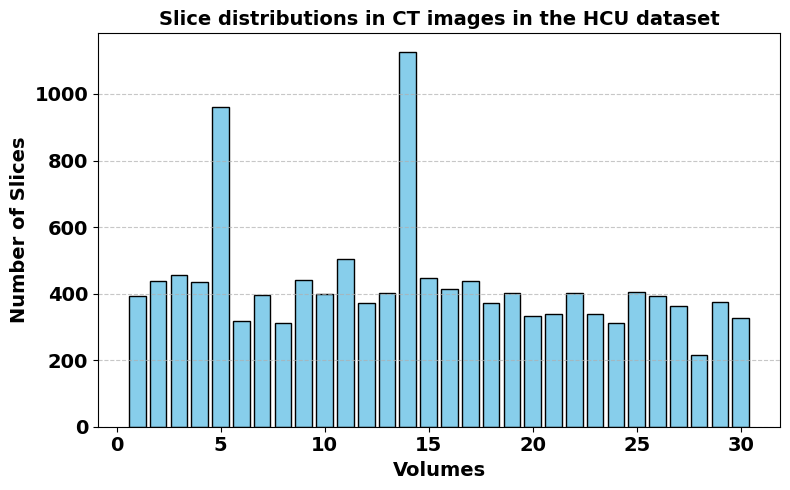

In [19]:
plot_intensity_distributions_fatias(hcu_mean_intensities, title="Average intensities in CT images in the HCU dataset", title_y='Intensity Average (HU)')
#plot_intensity_distributions_fatias(hcu_sum_intensities, title="Sum of intensity in CT images in the HCU dataset", title_y='Sum of Intensities (HU)')
#plot_intensity_distributions_fatias(hcu_min_intensities, title="Minimum intensity values ​​in CT images from the HCU dataset", title_y='Intensities (HU)')
#plot_intensity_distributions_fatias(hcu_max_intensities, title="Maximum intensity values ​​in CT images from the HCU dataset", title_y='Intensities (HU)')
plot_intensity_distributions_fatias(hcu_slices, title="Slice distributions in CT images in the HCU dataset", title_x='Volumes', title_y='Number of Slices')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


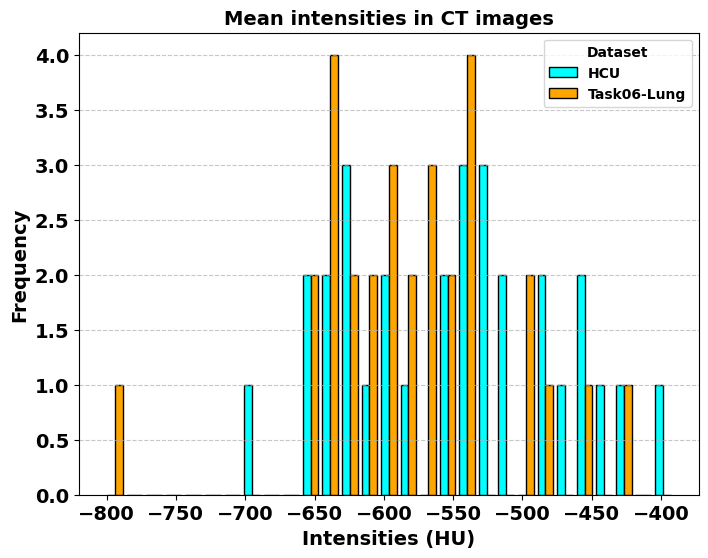

In [20]:
import numpy as np
import matplotlib.pyplot as plt

title = 'Mean intensities in CT images'

# Defining common bins
bins = np.linspace(min(np.min(task06_mean_intensities), np.min(hcu_mean_intensities)), max(np.max(task06_mean_intensities), np.max(hcu_mean_intensities)), 30)

# Create the histogram
plt.figure(figsize=(8, 6))
#plt.hist(hcu_mean_intensities, bins=bins, alpha=0.5, color='Orange', label='HCU', edgecolor='black')
#plt.hist(task06_mean_intensities, bins=bins, alpha=0.5, color='Cyan', label='Task06-Lung', edgecolor='black')

#plt.hist([hcu_mean_intensities, task06_mean_intensities], bins=bins, alpha=0.7, label=['HCU', 'Task06-Lung'], edgecolor='black', stacked=False)
plt.hist([hcu_mean_intensities, task06_mean_intensities], bins=bins, label=['HCU', 'Task06-Lung'], color=['Cyan','Orange'], edgecolor='black', stacked=False)

# Chart settings
plt.xlabel('Intensities (HU)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title(title, fontsize=14, fontweight='bold')

legend = plt.legend(title="Dataset", fontsize=10, bbox_to_anchor=(1.0, 1))
plt.setp(legend.get_title(), fontweight='bold')
plt.setp(legend.get_texts(), fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(fontsize=14, fontweight='bold')  # Rótulos do eixo X
plt.yticks(fontsize=14, fontweight='bold')  # Rótulos do eixo Y

plt.savefig(f"images/{title.replace(' ','_')}.eps", dpi=200, format='eps')
#plt.savefig(f"images/{title.replace(' ','_')}.png", transparent=True, dpi=200, format='png')

# Display the chart
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


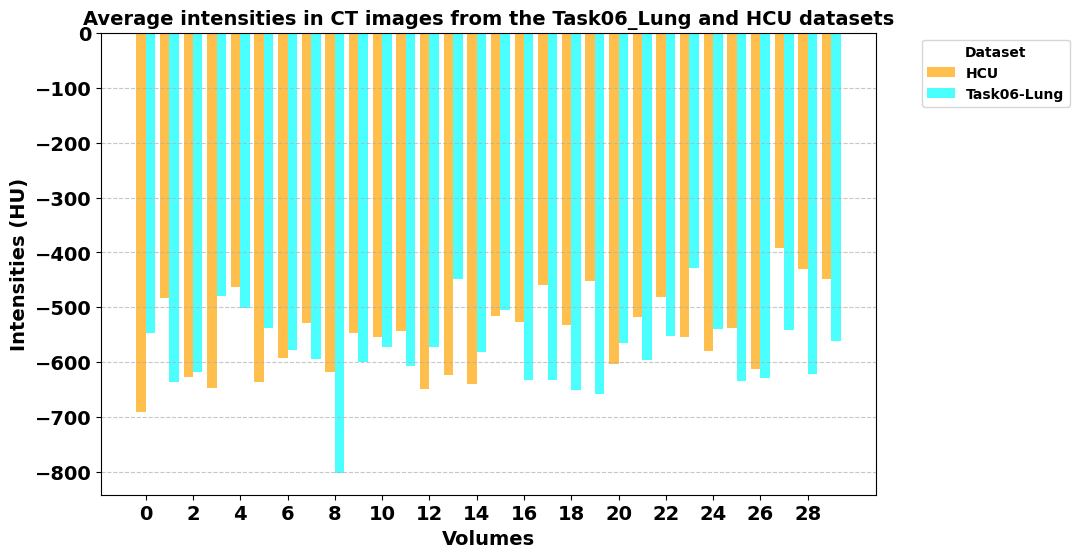

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Create indices for the images
indices = np.arange(30)  # 30 images

# Bar width
width = 0.4

title = 'Average intensities in CT images from the Task06_Lung and HCU datasets'

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(indices - width/2, hcu_mean_intensities, width, color='Orange', label='HCU', alpha=0.7)
plt.bar(indices + width/2, task06_mean_intensities, width, color='Cyan', label='Task06-Lung', alpha=0.7)

# Chart settings
plt.xlabel('Volumes', fontsize=14, fontweight='bold')
plt.ylabel('Intensities (HU)', fontsize=14, fontweight='bold')
plt.title(title, fontsize=14, fontweight='bold')
plt.xticks(indices)

legend = plt.legend(title="Dataset", fontsize=10, bbox_to_anchor=(1.05, 1))
plt.setp(legend.get_title(), fontweight='bold')
plt.setp(legend.get_texts(), fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(indices[::2], fontsize=14, fontweight='bold')  # Rótulos do eixo X
plt.yticks(fontsize=14, fontweight='bold')  # Rótulos do eixo Y

plt.savefig(f"images/{title.replace(' ','_')}.eps", dpi=200, format='eps')

# Display chart
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


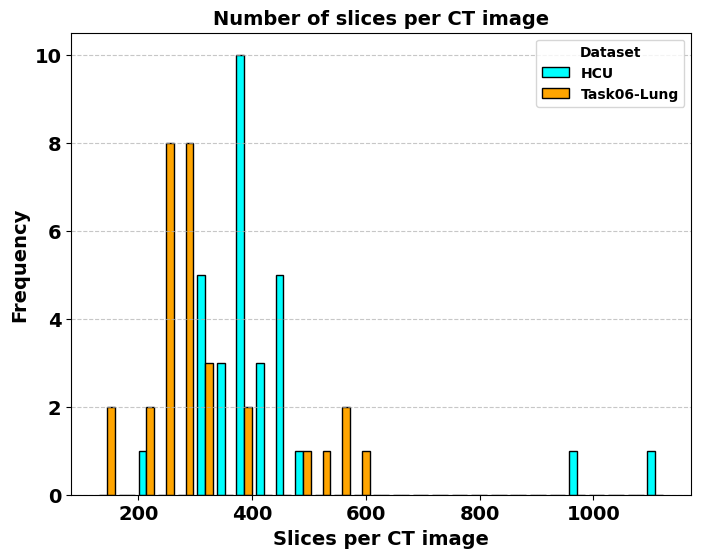

In [22]:
import numpy as np
import matplotlib.pyplot as plt

title = 'Number of slices per CT image'

# Defining common bins
bins = np.linspace(min(np.min(task06_slices), np.min(hcu_slices)), max(np.max(task06_slices), np.max(hcu_slices)), 30)

# Create the histogram
plt.figure(figsize=(8, 6))
#plt.hist(hcu_slices, bins=bins, alpha=0.5, color='Orange', label='HCU', edgecolor='black')
#plt.hist(task06_slices, bins=bins, alpha=0.5, color='Cyan', label='Task06-Lung', edgecolor='black')

bin_width = bins[1] - bins[0]
#plt.bar(bins[:-1], np.histogram(hcu_slices, bins=bins)[0], width=bin_width * 0.4, color='Orange', label='HCU', align='edge')
#plt.bar(bins[:-1] + bin_width * 0.4, np.histogram(task06_slices, bins=bins)[0], width=bin_width * 0.4, color='Cyan', label='Task06-Lung', align='edge')

#plt.hist([hcu_slices, task06_slices], bins=bins, alpha=0.7, label=['HCU', 'Task06-Lung'], edgecolor='black', stacked=False)
plt.hist([hcu_slices, task06_slices], bins=bins, label=['HCU', 'Task06-Lung'], color=['Cyan','Orange'], edgecolor='black', stacked=False)

# Chart settings
plt.xlabel('Slices per CT image', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title(title, fontsize=14, fontweight='bold')

legend = plt.legend(title="Dataset", fontsize=10, bbox_to_anchor=(1.0, 1))
plt.setp(legend.get_title(), fontweight='bold')
plt.setp(legend.get_texts(), fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(fontsize=14, fontweight='bold')  # Rótulos do eixo X
plt.yticks(fontsize=14, fontweight='bold')  # Rótulos do eixo Y

plt.savefig(f"images/{title.replace(' ','_')}.eps", dpi=200, format='eps')
#plt.savefig(f"images/{title.replace(' ','_')}.png", transparent=True, dpi=200, format='png')

# Display the chart
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


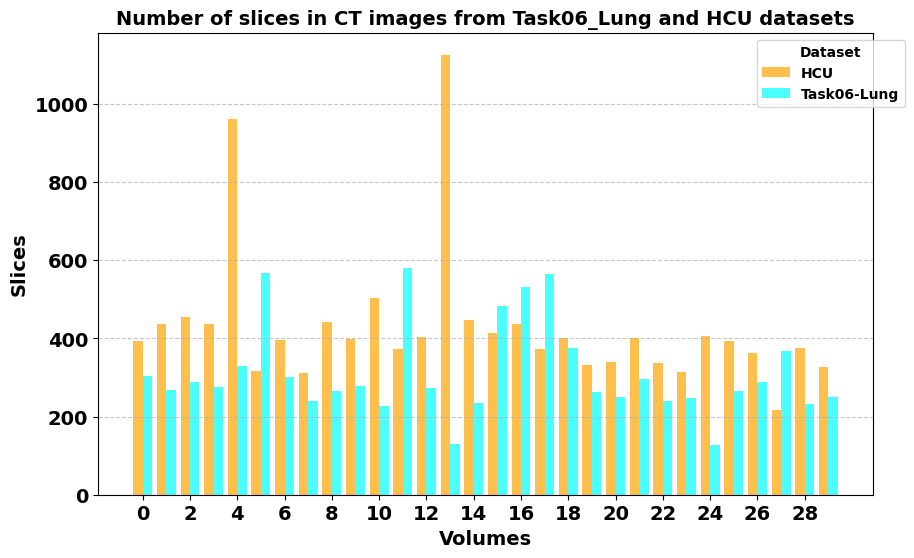

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# # Create indices for the images
indices = np.arange(30)  # 30 images

# Bar width
width = 0.4

title = 'Number of slices in CT images from Task06_Lung and HCU datasets'

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(indices - width/2, hcu_slices, width, color='Orange', label='HCU', alpha=0.7)
plt.bar(indices + width/2, task06_slices, width, color='Cyan', label='Task06-Lung', alpha=0.7)

# Chart settings
plt.xlabel('Volumes', fontsize=14, fontweight='bold')
plt.ylabel('Slices', fontsize=14, fontweight='bold')
plt.title(title, fontsize=14, fontweight='bold')
plt.xticks(indices)  # Definir os índices no eixo X

legend = plt.legend(title="Dataset", fontsize=10, bbox_to_anchor=(1.05, 1))
plt.setp(legend.get_title(), fontweight='bold')
plt.setp(legend.get_texts(), fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(indices[::2], fontsize=14, fontweight='bold')  # Rótulos do eixo X
plt.yticks(fontsize=14, fontweight='bold')  # Rótulos do eixo Y

plt.savefig(f"images/{title.replace(' ','_')}.eps", dpi=200, format='eps')

# Display chart
plt.show()

# Intensities in the lung areaIntensities in the lung area

In [24]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import SimpleITK as sitk

# Function to load NIfTI images (.nii)
def load_nii_image(filepath):
	img = nib.load(filepath)
	img_data = img.get_fdata()
	return img_data

# Function to extract the maximum and minimum intensities from a list of images
def extract_min_max_intensities(image_paths):
	min_intensities = []
	max_intensities = []
	mean_intensities = []
	mean_intensities_no_zero = []
	sum_intensities = []
	slices = []

	min_slice = 10000
	max_slice = 0

	for image_path in image_paths:
		label_path = image_path.replace('.nii.gz','_label.nrrd').replace('images_','labels_')

		#img_data = load_nii_image(image_path)
		img_data = sitk.GetArrayFromImage(sitk.ReadImage(image_path))
		tgt_data = sitk.GetArrayFromImage(sitk.ReadImage(label_path))

		tgt_data[tgt_data>0]=1

		new_image = np.zeros(img_data.shape).astype(img_data.dtype)
		#print(new_image.shape)
		#new_image = np.where(tgt_data == 1, img_data, img_data.min())
		new_image = np.where(tgt_data == 1, img_data, 0)
		img_data = new_image

		#img_data = np.clip(img_data, -1024, 1024)
		#data_clipped = data_clipped.astype(img_data.dtype)

		min_intensities.append(np.min(img_data))
		max_intensities.append(np.max(img_data))
		if (np.mean(img_data))!=0:
			mean_intensities_no_zero.append(np.mean(img_data))
		mean_intensities.append(np.mean(img_data))
		sum_intensities.append(np.sum(img_data))
		slices.append(img_data.shape[0])

		if min_slice>img_data.shape[0]:
			min_slice=img_data.shape[0]
		if max_slice<img_data.shape[0]:
			max_slice=img_data.shape[0]

		ID_image = os.path.basename(image_path).replace('.nii.gz','')

		print(ID_image, np.min(img_data), np.max(img_data), np.mean(img_data))

	return min_intensities, max_intensities, mean_intensities, mean_intensities_no_zero, sum_intensities, slices, min_slice, max_slice

# List of paths to sample images
hcu_paths = sorted(glob.glob(os.path.join('/mnt/data/dataset_test/images_HCU', '*.nii.gz')))
task06_paths = sorted(glob.glob(os.path.join('/mnt/data/dataset_test/images_Task06', '*.nii.gz')))

print('Number of images in the dataset:', len(hcu_paths))
print('Number of images in the dataset:', len(task06_paths))

# Extraction of maximum and minimum intensities
task06_min_intensities, task06_max_intensities, task06_mean_intensities, task06_mean_intensities_no_zero, task06_sum_intensities, task06_slices, task06_min_slice, task06_max_slice = extract_min_max_intensities(task06_paths)

print(np.min(task06_min_intensities))
print(np.min(task06_max_intensities))

print(task06_min_slice)
print(task06_max_slice)

# Extraction of maximum and minimum intensities
hcu_min_intensities, hcu_max_intensities, hcu_mean_intensities, hcu_mean_intensities_no_zero, hcu_sum_intensities, hcu_slices, hcu_min_slice, hcu_max_slice = extract_min_max_intensities(hcu_paths)

print(np.min(hcu_min_intensities))
print(np.min(hcu_max_intensities))

print(hcu_min_slice)
print(hcu_max_slice)

30
30
lung_001 -1024.0 1437.0 -81.60915
lung_002 -1024.0 1002.0 -56.15977
lung_003 -1024.0 1842.0 -63.86935
lung_004 -1024.0 2667.0 -78.62543
lung_005 -1024.0 894.0 -86.07795
lung_006 -1024.0 1640.0 -47.74952
lung_009 -1024.0 750.0 -76.96204
lung_010 -1024.0 2460.0 -92.49965
lung_013 -1024.0 804.0 -54.414562
lung_015 -1024.0 1621.0 -48.706898
lung_016 -1024.0 1904.0 -68.49121
lung_017 -1024.0 3071.0 -77.65401
lung_018 -1024.0 2396.0 -68.74512
lung_019 -1024.0 849.0 -59.120182
lung_021 -1024.0 1236.0 -78.45805
lung_022 -1024.0 1148.0 -32.791134
lung_023 -1024.0 1541.0 -76.83893
lung_024 -1024.0 1281.0 -78.20328
lung_025 -1024.0 1448.0 -95.583015
lung_027 -1024.0 2009.0 -104.19693
lung_028 -1024.0 1712.0 -59.210915
lung_034 -1024.0 3071.0 -49.498108
lung_041 -1024.0 2723.0 -48.76142
lung_064 -1024.0 3071.0 -64.39838
lung_065 -1024.0 695.0 -93.99771
lung_070 -1024.0 1480.0 -119.47033
lung_071 -1024.0 2519.0 -130.35529
lung_074 -1024.0 1671.0 -138.08434
lung_095 -1024.0 2126.0 -103.59992
l

In [25]:
print('Paths (Task06-Lung):', sorted(task06_mean_intensities, reverse=True))
print('Paths (HCU):', sorted(hcu_mean_intensities, reverse=True))

[-32.791134, -47.74952, -48.706898, -48.76142, -49.498108, -54.414562, -56.15977, -59.120182, -59.210915, -63.86935, -64.39838, -68.49121, -68.74512, -76.83893, -76.96204, -77.65401, -78.20328, -78.45805, -78.62543, -81.60915, -86.07795, -92.49965, -93.99771, -95.583015, -103.59992, -104.19693, -119.068924, -119.47033, -130.35529, -138.08434]
[-18.771169699256415, -29.171794734335986, -32.17796143079524, -33.052090807025934, -33.610779478907965, -37.61974495437545, -38.121768007374776, -41.06790812376415, -42.816248653856526, -43.04215387890121, -44.142814504689184, -44.282377618444606, -45.15893535433508, -46.468204682378285, -48.6419832220125, -51.00013506059816, -51.8885141305588, -52.57143006154469, -57.34068659832353, -60.24222888337805, -60.816899081777194, -65.66945133121332, -68.05425786029288, -73.06138530713783, -74.82622531755945, -77.02651225474843, -78.73904750543997, -80.22547108724237, -82.70720558051949, -83.8742660236103]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


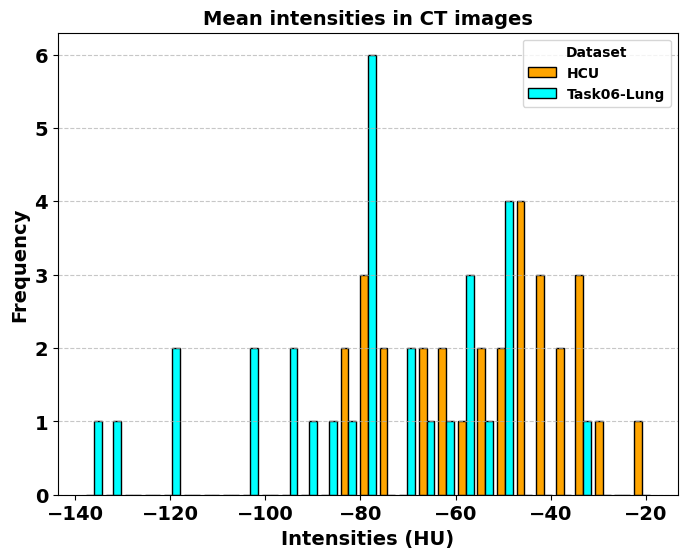

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Suponha que esses sejam os vetores com as intensidades das imagens
intensities_hcu = np.random.normal(100, 20, 30)  # Simulação de dados
intensities_task06 = np.random.normal(120, 25, 30)  # Simulação de dados

title = 'Mean intensities in CT images'

# Defining common bins
bins = np.linspace(min(np.min(task06_mean_intensities), np.min(hcu_mean_intensities)), max(np.max(task06_mean_intensities), np.max(hcu_mean_intensities)), 30)

# Create the histogram
plt.figure(figsize=(8, 6))
#plt.hist(hcu_mean_intensities, bins=bins, alpha=0.5, color='Orange', label='HCU', edgecolor='black')
#plt.hist(task06_mean_intensities, bins=bins, alpha=0.5, color='Cyan', label='Task06-Lung', edgecolor='black')

#plt.hist([hcu_mean_intensities, task06_mean_intensities], bins=bins, alpha=0.7, label=['HCU', 'Task06-Lung'], edgecolor='black', stacked=False)
plt.hist([hcu_mean_intensities, task06_mean_intensities], bins=bins, label=['HCU', 'Task06-Lung'], color=['Orange', 'Cyan'], edgecolor='black', stacked=False)

# Chart settings
plt.xlabel('Intensities (HU)', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title(title, fontsize=14, fontweight='bold')

legend = plt.legend(title="Dataset", fontsize=10, bbox_to_anchor=(1.0, 1))
plt.setp(legend.get_title(), fontweight='bold')
plt.setp(legend.get_texts(), fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xticks(fontsize=14, fontweight='bold')  # Rótulos do eixo X
plt.yticks(fontsize=14, fontweight='bold')  # Rótulos do eixo Y

plt.savefig(f"images/{title.replace(' ','_')}_lung.eps", dpi=200, format='eps')
#plt.savefig(f"images/{title.replace(' ','_')}.png", transparent=True, dpi=200, format='png')

# Display the chart
plt.show()

In [28]:
image_path = '/mnt/data/dataset_test/images_HCU/locca_covid_014.nii.gz'

image = load_nii_image(image_path)
print(image.shape, image.min(), image.max(), image.mean())

image = np.clip(image, -1024, 1024)
print(image.shape, image.min(), image.max(), image.mean())

(512, 512, 1126) -31960.0 31696.0 -861.2620125629974
(512, 512, 1126) -1024.0 1024.0 -622.9713400811962
